Realizar o teste do codigo da aula 07 no notion, sobre KNN em Python com SKLearn

Matriz de Confusão:
 [[ 452   41  294]
 [  21 2067  328]
 [ 151  417 1329]]


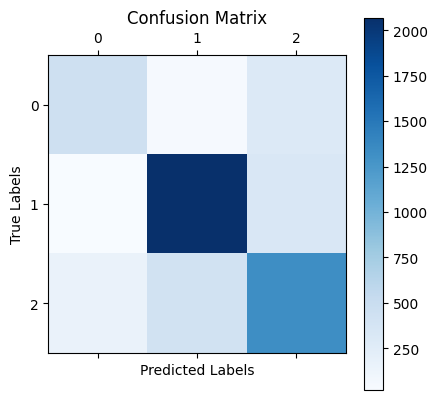

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv("../database/california_housing_train.csv")

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

y = pd.cut(y, bins=3, labels=['baixo', 'médio', 'alto'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

knn_cls = KNeighborsClassifier(n_neighbors=5)

knn_cls.fit(X_train, y_train)

y_pred = knn_cls.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division='warn')
recall = recall_score(y_val, y_pred, average='weighted', zero_division='warn')
f1 = f1_score(y_val, y_pred, average='weighted', zero_division='warn')


cm = confusion_matrix(y_val, y_pred)
print("Matriz de Confusão:\n", cm)


plt.matshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()





In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns # Importado para o heatmap
import numpy as np # Importado para o gráfico de cotovelo

# --- Carregamento e Preparação dos Dados (igual ao seu código) ---
data = pd.read_csv("../database/california_housing_train.csv")

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Discretiza a variável alvo em 3 classes
labels = ['baixo', 'médio', 'alto']
y = pd.cut(y, bins=3, labels=labels)

# Escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/validação
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# --- Treinamento do Modelo k=5 (igual ao seu código) ---
k_original = 5
knn_cls = KNeighborsClassifier(n_neighbors=k_original)
knn_cls.fit(X_train, y_train)
y_pred = knn_cls.predict(X_val)

# --- Cálculo das Métricas (igual ao seu código) ---
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

print(f"--- Métricas para k={k_original} ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# =======================================================
# GRÁFICO 1: Matriz de Confusão (Versão melhorada com Seaborn)
# =======================================================
cm = confusion_matrix(y_val, y_pred, labels=labels)
print("\nMatriz de Confusão:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title(f'Gráfico 1: Matriz de Confusão (k={k_original})')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


# =======================================================
# GRÁFICO 2: Visualização das Métricas de Desempenho
# =======================================================
metrics_dict = {
    'Acurácia': accuracy,
    'Precisão (ponderada)': precision,
    'Recall (ponderado)': recall,
    'F1-Score (ponderado)': f1
}

plt.figure(figsize=(10, 5))
metrics_names = list(metrics_dict.keys())
metrics_values = list(metrics_dict.values())

bars = plt.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title(f'Gráfico 2: Métricas de Desempenho (k={k_original})')
plt.ylabel('Pontuação')
plt.ylim(0, 1) # Define o limite do eixo Y de 0 a 1

# Adiciona os valores no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.show()


# =======================================================
# GRÁFICO 3: Método do Cotovelo (Accuracy vs. Valor de 'k')
# =======================================================
k_range = range(1, 31) # Testar k de 1 a 30
accuracies = []

print("\nCalculando acurácia para diferentes valores de 'k'...")

for k in k_range:
    knn_loop = KNeighborsClassifier(n_neighbors=k)
    knn_loop.fit(X_train, y_train)
    y_pred_loop = knn_loop.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred_loop))

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='dashed', color='blue',
         markersize=8, markerfacecolor='red')
plt.title('Gráfico 3: Método do Cotovelo (Acurácia vs. Valor de k)')
plt.xlabel('Valor de k (n_neighbors)')
plt.ylabel('Acurácia')
plt.xticks(np.arange(1, 31, 2)) # Ajusta os marcadores do eixo X
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'seaborn'